In [1]:
! git clone https://github.com/vivekvivs42/DarkflowTry.git
! wget https://pjreddie.com/media/files/yolov2-tiny.weights

fatal: destination path 'DarkflowTry' already exists and is not an empty directory.
--2019-10-06 20:03:42--  https://pjreddie.com/media/files/yolov2-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44948600 (43M) [application/octet-stream]
Saving to: 'yolov2-tiny.weights’

yolov2-tiny.weights 100%[===================>]  42.87M  3.04MB/s    in 19s     

2019-10-06 20:04:02 (2.30 MB/s) - 'yolov2-tiny.weights’ saved [44948600/44948600]



In [19]:
cd /home/sami/roboticists/Model/DarkflowTry

/home/sami/roboticists/Model/DarkflowTry


In [20]:
! python3 setup.py build_ext --inplace


running build_ext
copying build/lib.linux-x86_64-3.6/darkflow/cython_utils/nms.cpython-36m-x86_64-linux-gnu.so -> darkflow/cython_utils
copying build/lib.linux-x86_64-3.6/darkflow/cython_utils/cy_yolo2_findboxes.cpython-36m-x86_64-linux-gnu.so -> darkflow/cython_utils
copying build/lib.linux-x86_64-3.6/darkflow/cython_utils/cy_yolo_findboxes.cpython-36m-x86_64-linux-gnu.so -> darkflow/cython_utils


In [21]:
! pip install -e . --user


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Obtaining file:///home/sami/roboticists/Model/DarkflowTry
  Found existing installation: darkflow 1.0.0
    Uninstalling darkflow-1.0.0:
      Successfully uninstalled darkflow-1.0.0
  Running setup.py develop for darkflow


In [22]:
! pip install . --user


DEPRECATION: Python 2.7 will reach the end of its life on January 1st, 2020. Please upgrade your Python as Python 2.7 won't be maintained after that date. A future version of pip will drop support for Python 2.7. More details about Python 2 support in pip, can be found at https://pip.pypa.io/en/latest/development/release-process/#python-2-support
Processing /home/sami/roboticists/Model/DarkflowTry
  Created wheel for darkflow: filename=darkflow-1.0.0-cp27-cp27mu-linux_x86_64.whl size=803181 sha256=c853e3f86d254a0a2bc4d6f1a1d70dff09422d5b6ac19269067444899c99abd7
  Stored in directory: /tmp/pip-ephem-wheel-cache-_BsgSe/wheels/30/6f/3e/19a1314055f96acc826892a40bd493c690e6692398e8cb9576
Successfully built darkflow
  Found existing installation: darkflow 1.0.0
    Uninstalling darkflow-1.0.0:
      Successfully uninstalled darkflow-1.0.0


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.contrib.slim as slim
from darkflow.net.build import TFNet
import cv2


In [24]:
ls

build/  darkflow/           dasdasd.jpg  item.jpg    preview.png  setup.py
cfg/    darkflow.egg-info/  demo.gif     labels.txt  README.md    test/
ckpt/   DarkflowTry/        flow*        LICENSE     sample_img/  YOLO.ipynb


In [37]:
options = {"model": "DarkflowTry/cfg/yolov2-tiny.cfg", 
           "load": "DarkflowTry/yolov2-tiny.weights",
           "Train":False,
           "threshold":0.01}

In [38]:
tfnet = TFNet(options)

Parsing ./cfg/yolov2-tiny.cfg
Parsing DarkflowTry/cfg/yolov2-tiny.cfg
Loading DarkflowTry/yolov2-tiny.weights ...
Successfully identified 44948600 bytes
Finished in 0.037134885788s


AssertionError: labels.txt and DarkflowTry/cfg/yolov2-tiny.cfg indicate inconsistent class numbers

In [41]:
import pprint as pp
original_img = cv2.imread("/home/sami/roboticists/Model/img/item.jpg")
original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(original_img)
print(results)





NameError: name 'tfnet' is not defined

TypeError: Image data cannot be converted to float

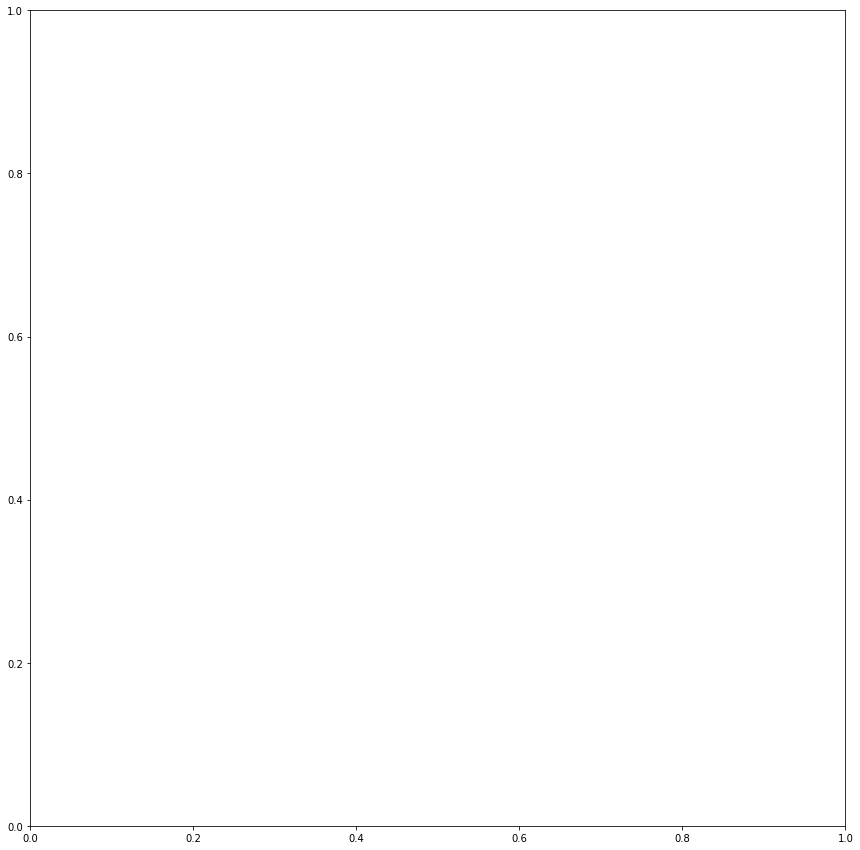

In [40]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(original_img)

In [10]:
def boxing(original_img , predictions):
    newImage = np.copy(original_img)

    for result in predictions:
        top_x = result['topleft']['x']
        top_y = result['topleft']['y']

        btm_x = result['bottomright']['x']
        btm_y = result['bottomright']['y']

        confidence = result['confidence']
        label = result['label'] + " " + str(round(confidence, 3))
        
        if confidence > 0.04:
            newImage = cv2.rectangle(newImage, (top_x, top_y), (btm_x, btm_y), (255,0,0), 3)
            newImage = cv2.putText(newImage, label, (top_x, top_y-5), cv2.FONT_HERSHEY_COMPLEX_SMALL , 0.8, (0, 230, 0), 1, cv2.LINE_AA)
        
    return newImage

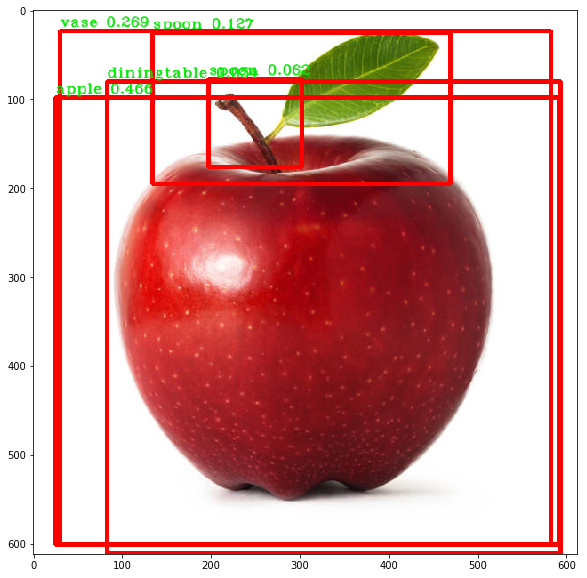

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(boxing(original_img, results))